# **Load the Dataset**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = "/content/diabetes.csv"

df = pd.read_csv(dataset)
df.head()

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                34            23  43.509726          1.213191   21         0  
1                47            36  21.240576          0.158365   23         0  
2                52            35  41.511523          0.079019   23         0  
3                25           304  29.582192          1.282870   43         1  
4                27            35  42.604536          0.549542   22         0

In [6]:
df.describe()

PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.500000e+04  15000.000000   15000.000000            15000.000000   
mean   1.502922e+06      3.224533     107.856867               71.220667   
std    2.892534e+05      3.391020      31.981975               16.758716   
min    1.000038e+06      0.000000      44.000000               24.000000   
25%    1.252866e+06      0.000000      84.000000               58.000000   
50%    1.505508e+06      2.000000     104.000000               72.000000   
75%    1.755205e+06      6.000000     129.000000               85.000000   
max    1.999997e+06     14.000000     192.000000              117.000000   

       TricepsThickness  SerumInsulin           BMI  DiabetesPedigree  \
count      15000.000000  15000.000000  15000.000000      15000.000000   
mean          28.814000    137.852133     31.509646          0.398968   
std           14.555716    133.068252      9.759000          0.377944   
min            7.000000     14.000000     18.200512          0.078044   
25%           15.000000     39.000000     21.259887          0.137743   
50%           31.000000     83.000000     31.767940          0.200297   
75%           41.000000    195.000000     39.259692          0.616285   
max           93.000000    799.000000     56.034628          2.301594   

                Age      Diabetic  
count  15000.000000  15000.000000  
mean      30.137733      0.333333  
std       12.089703      0.471420  
min       21.000000      0.000000  
25%       22.000000      0.000000  
50%       24.000000      0.000000  
75%       35.000000      1.000000  
max       77.000000      1.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [8]:
df.columns

Index(['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic'],
      dtype='object')

In [9]:
int_list = ['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'Age',
       'Diabetic']

flt_list = ['BMI', 'DiabetesPedigree']

for col in int_list:
  df[col] = df[col].astype('int32') #notebook does not support int16

for col in flt_list:
  df[col] = df[col].astype('float32') #notebook does not support float16

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int32  
 1   Pregnancies             15000 non-null  int32  
 2   PlasmaGlucose           15000 non-null  int32  
 3   DiastolicBloodPressure  15000 non-null  int32  
 4   TricepsThickness        15000 non-null  int32  
 5   SerumInsulin            15000 non-null  int32  
 6   BMI                     15000 non-null  float32
 7   DiabetesPedigree        15000 non-null  float32
 8   Age                     15000 non-null  int32  
 9   Diabetic                15000 non-null  int32  
dtypes: float32(2), int32(8)
memory usage: 586.1 KB


In [10]:
['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic']

['PatientID',
 'Pregnancies',
 'PlasmaGlucose',
 'DiastolicBloodPressure',
 'TricepsThickness',
 'SerumInsulin',
 'BMI',
 'DiabetesPedigree',
 'Age',
 'Diabetic']

In [11]:
df.value_counts('Diabetic')

Diabetic
0    10000
1     5000
Name: count, dtype: int64

This Data is unbalance, there is a need to balance it while training the model to avoid

In [12]:
df.isna().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

No missing Data

In [13]:
#Validating data

df[df['Diabetic'].isin([1, 0]) == False]


Empty DataFrame
Columns: [PatientID, Pregnancies, PlasmaGlucose, DiastolicBloodPressure, TricepsThickness, SerumInsulin, BMI, DiabetesPedigree, Age, Diabetic]
Index: []

In [14]:
for cols in df.columns:
  min = df[cols].min()
  max = df[cols].max()
  print(f'{cols}, \n \t {min},  \n \t {max}')

PatientID, 
 	 1000038,  
 	 1999997
Pregnancies, 
 	 0,  
 	 14
PlasmaGlucose, 
 	 44,  
 	 192
DiastolicBloodPressure, 
 	 24,  
 	 117
TricepsThickness, 
 	 7,  
 	 93
SerumInsulin, 
 	 14,  
 	 799
BMI, 
 	 18.200511932373047,  
 	 56.03462600708008
DiabetesPedigree, 
 	 0.07804379612207413,  
 	 2.3015942573547363
Age, 
 	 21,  
 	 77
Diabetic, 
 	 0,  
 	 1


In [15]:
df.groupby('Age')['Diabetic'].count()

Age
21    2556
22    2486
23    1990
24     966
25     991
26    1001
28      29
29      50
30     211
31     196
32     226
33     197
34     236
35     232
36      67
37      74
38     119
39     101
40     106
41     102
42     134
43     266
44     272
45     315
46     270
47     259
48      47
49      55
50      58
51      50
52      63
53     144
54     112
55     128
56     122
57     106
58      71
59      75
60      80
61      78
62      63
63       9
64      11
65      18
66      40
67      49
68      27
69      39
70      29
71      42
72       4
73       7
74       5
75       7
76       5
77       4
Name: Diabetic, dtype: int64

In [16]:
df.Age.nunique()

56

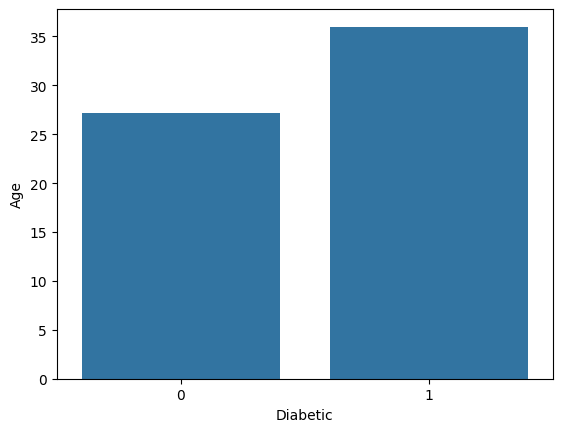

In [17]:
sns.barplot(data=df, y='Age', x='Diabetic', errorbar=None)

plt.show()

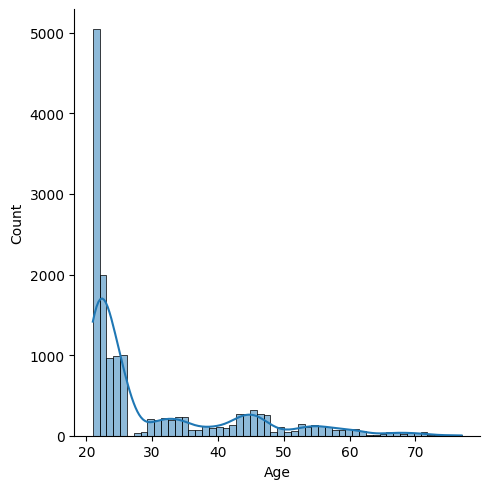

In [18]:
sns.displot(df['Age'], kde=True)

plt.show()

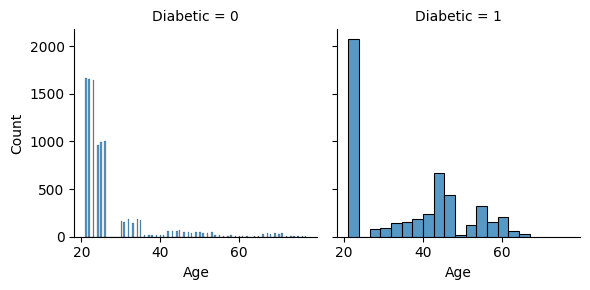

In [19]:
g = sns.FacetGrid(df, col="Diabetic")
g.map(sns.histplot, "Age")

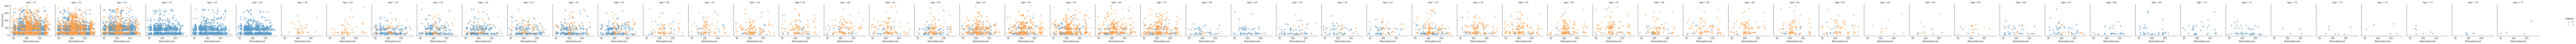

In [20]:
h = sns.FacetGrid(df, col="Age", hue='Diabetic')
h.map(sns.scatterplot, 'PlasmaGlucose', "SerumInsulin", alpha=0.7)
h.add_legend()

<Axes: xlabel='PlasmaGlucose', ylabel='SerumInsulin'>

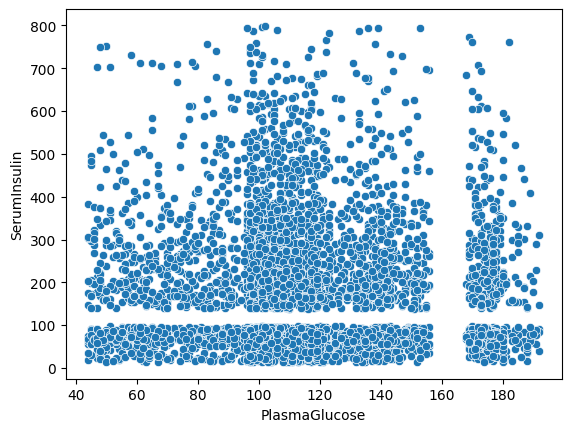

In [21]:
df_confirmed = df[df['Diabetic']==1]


sns.scatterplot(df_confirmed, x='PlasmaGlucose', y="SerumInsulin")

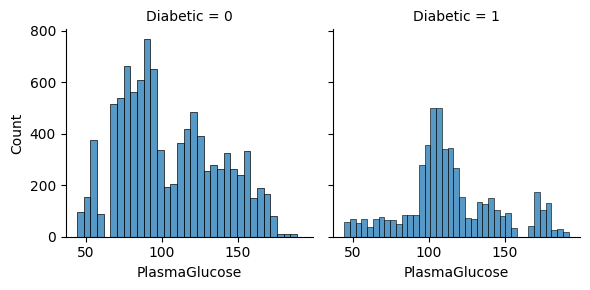

In [22]:
g = sns.FacetGrid(df, col="Diabetic")
g.map(sns.histplot, "PlasmaGlucose")

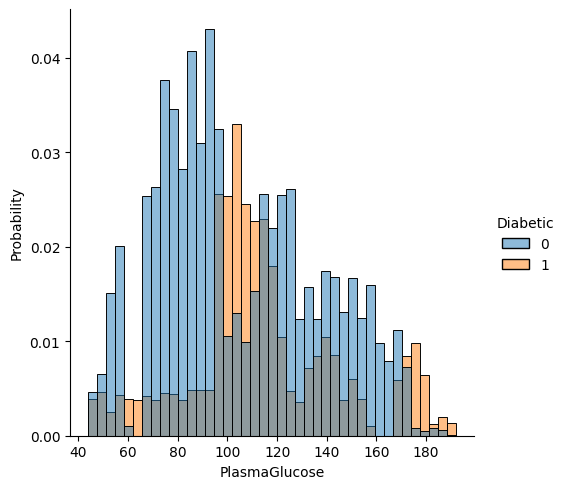

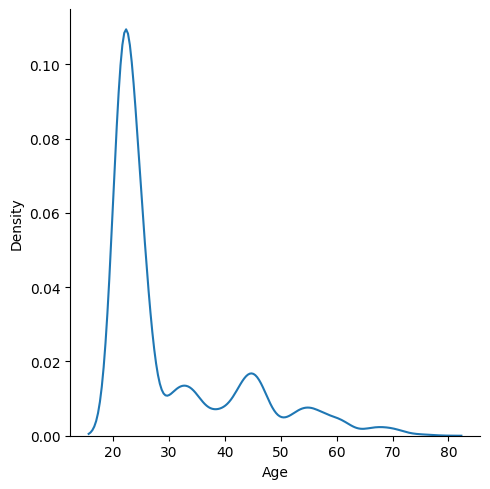

In [23]:
sns.displot(df, x="PlasmaGlucose", hue="Diabetic", stat="probability")
sns.displot(df, x="Age", kind="kde")

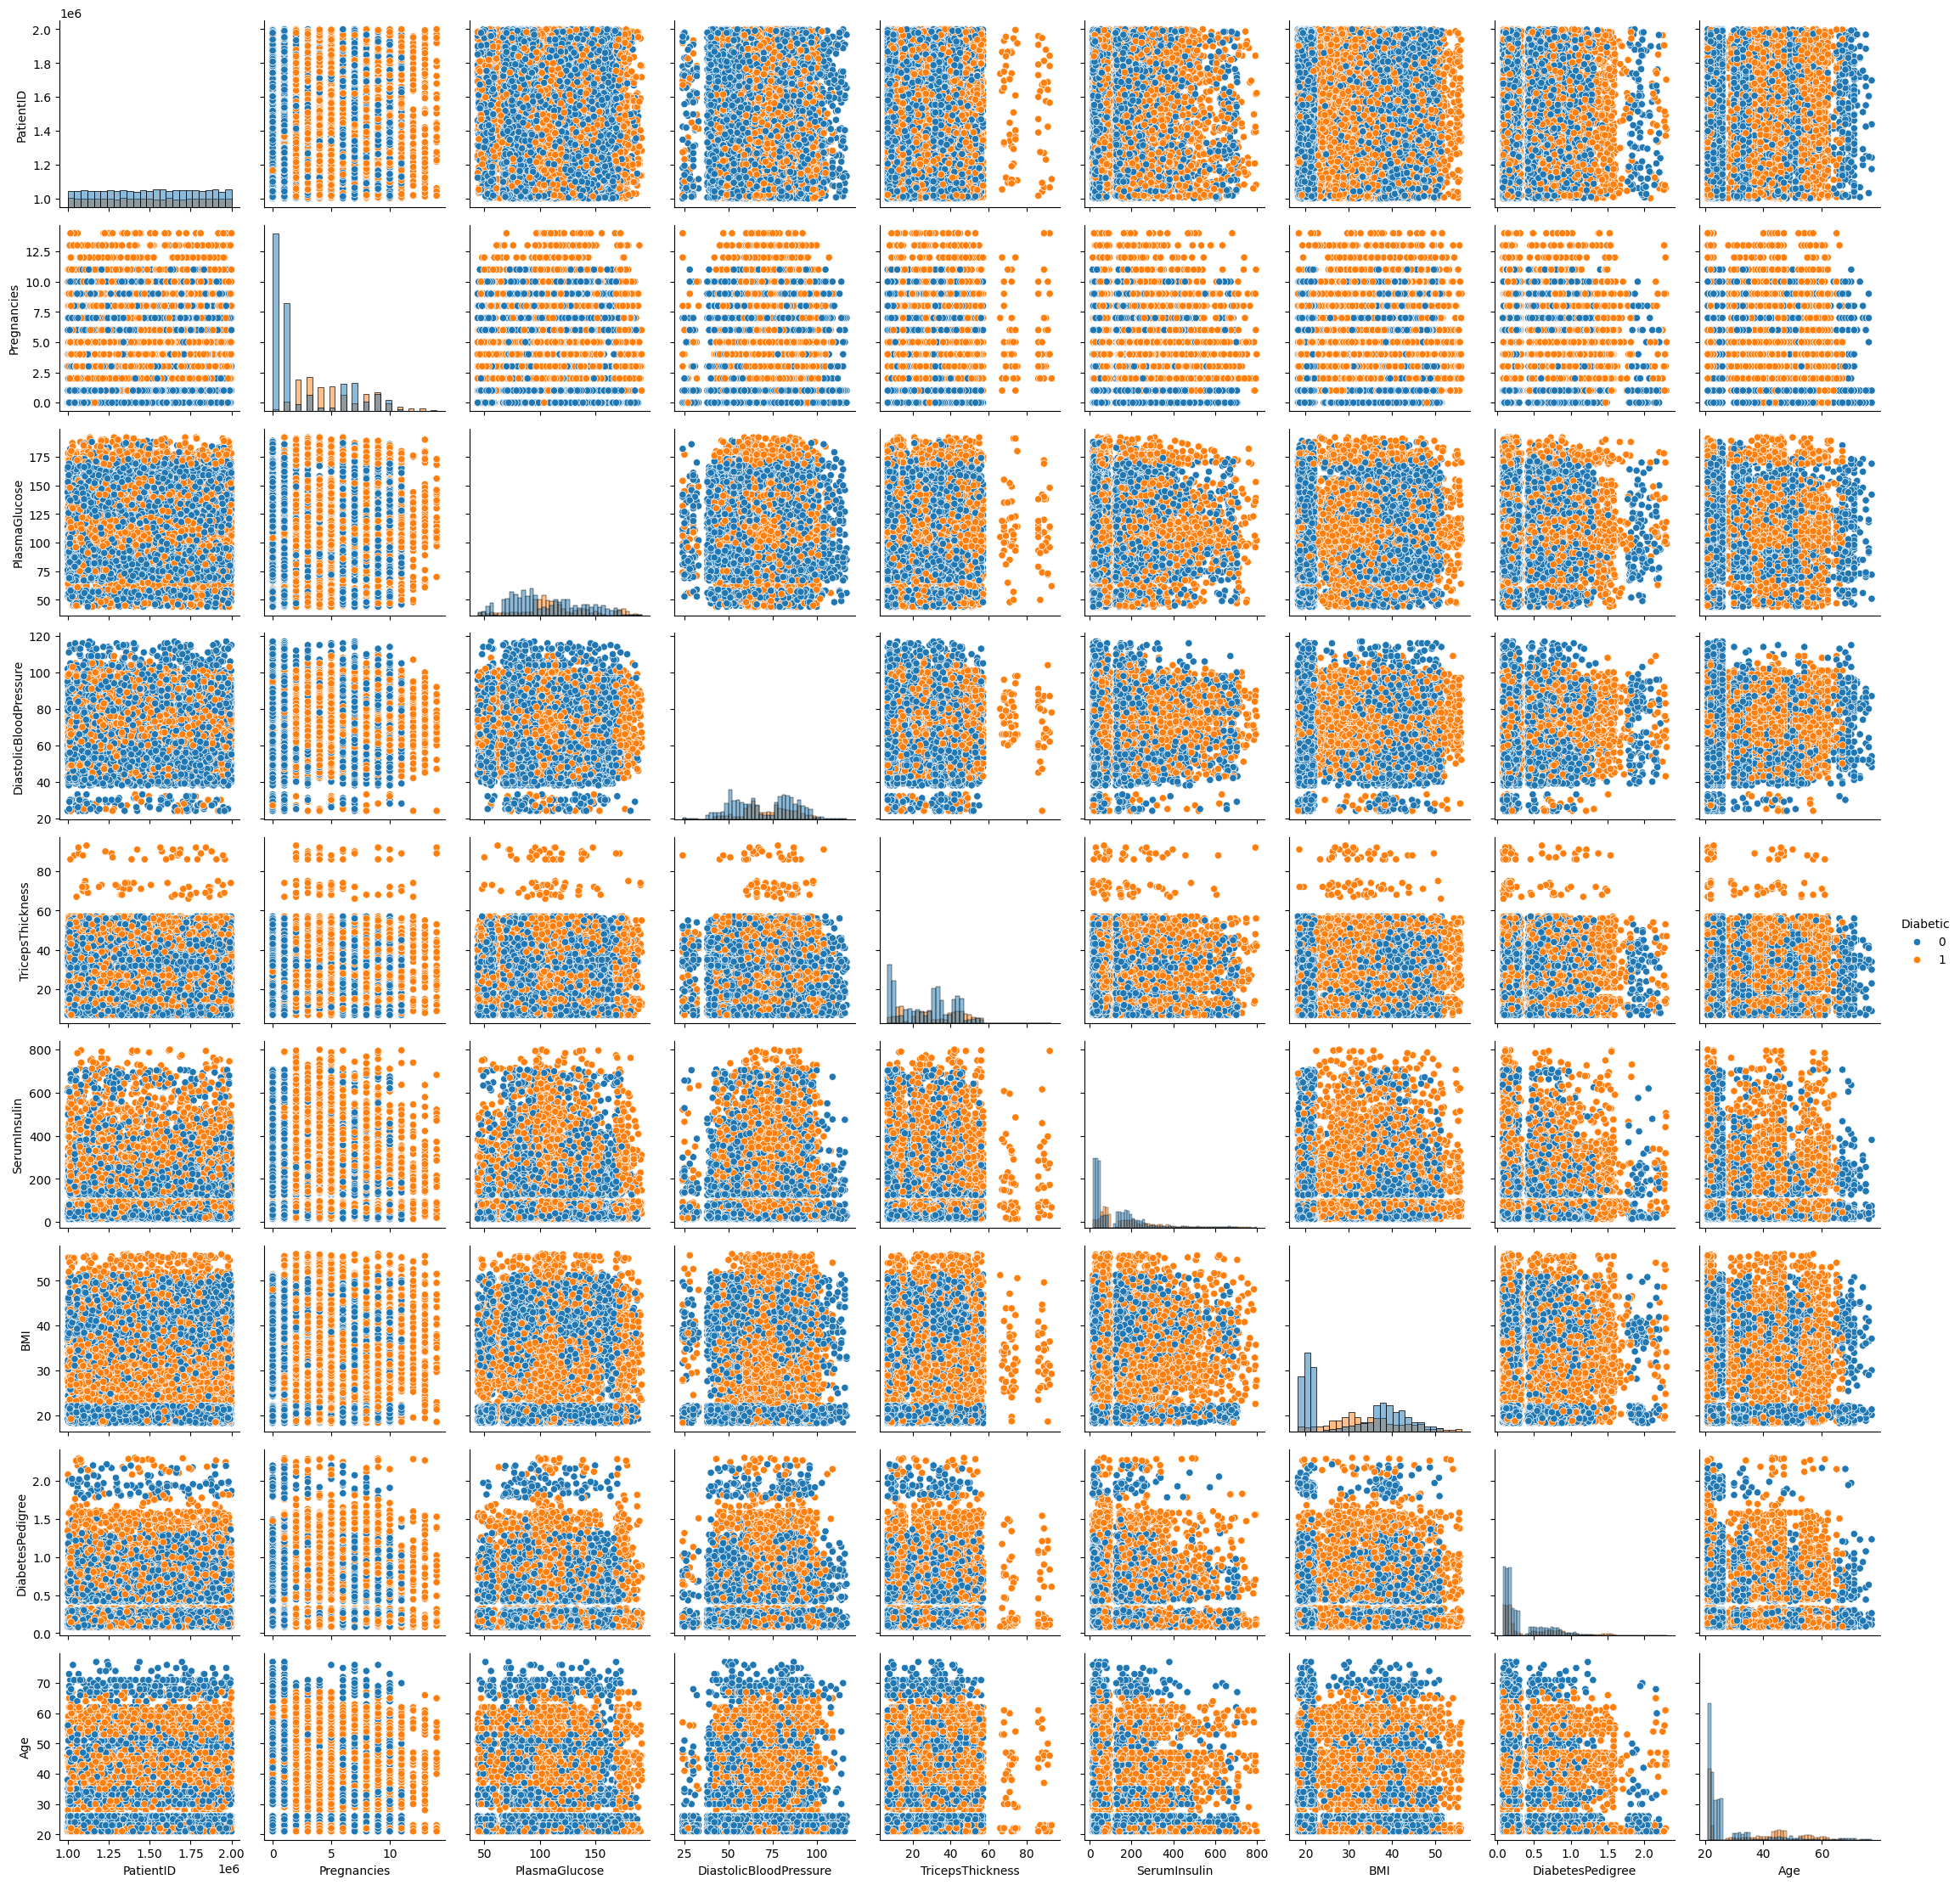

In [24]:
l = sns.PairGrid(df, hue="Diabetic")
l.map_diag(sns.histplot)
l.map_offdiag(sns.scatterplot)
l.add_legend()

Appears TricepsThickness, BMI is significant

In [25]:
df.corr(method='pearson')

PatientID  Pregnancies  PlasmaGlucose  \
PatientID                1.000000     0.006774      -0.001858   
Pregnancies              0.006774     1.000000       0.054502   
PlasmaGlucose           -0.001858     0.054502       1.000000   
DiastolicBloodPressure   0.008746     0.043528       0.007212   
TricepsThickness        -0.002406     0.063605       0.027100   
SerumInsulin            -0.020698     0.104487       0.033545   
BMI                     -0.003156     0.086386       0.020653   
DiabetesPedigree        -0.015413     0.054240       0.009057   
Age                     -0.007096     0.136972       0.038864   
Diabetic                -0.012494     0.407315       0.128004   

                        DiastolicBloodPressure  TricepsThickness  \
PatientID                             0.008746         -0.002406   
Pregnancies                           0.043528          0.063605   
PlasmaGlucose                         0.007212          0.027100   
DiastolicBloodPressure                1.000000          0.011106   
TricepsThickness                      0.011106          1.000000   
SerumInsulin                          0.022649          0.029688   
BMI                                   0.015873          0.024745   
DiabetesPedigree                      0.014099         -0.000951   
Age                                   0.041333          0.061383   
Diabetic                              0.091307          0.152505   

                        SerumInsulin       BMI  DiabetesPedigree       Age  \
PatientID                  -0.020698 -0.003156         -0.015413 -0.007096   
Pregnancies                 0.104487  0.086386          0.054240  0.136972   
PlasmaGlucose               0.033545  0.020653          0.009057  0.038864   
DiastolicBloodPressure      0.022649  0.015873          0.014099  0.041333   
TricepsThickness            0.029688  0.024745         -0.000951  0.061383   
SerumInsulin                1.000000  0.051223          0.046324  0.088007   
BMI                         0.051223  1.000000          0.028868  0.062910   
DiabetesPedigree            0.046324  0.028868          1.000000  0.055633   
Age                         0.088007  0.062910          0.055633  1.000000   
Diabetic                    0.247375  0.210508          0.170302  0.342605   

                        Diabetic  
PatientID              -0.012494  
Pregnancies             0.407315  
PlasmaGlucose           0.128004  
DiastolicBloodPressure  0.091307  
TricepsThickness        0.152505  
SerumInsulin            0.247375  
BMI                     0.210508  
DiabetesPedigree        0.170302  
Age                     0.342605  
Diabetic                1.000000

In [27]:
df.corr(method='kendall')

PatientID  Pregnancies  PlasmaGlucose  \
PatientID                1.000000     0.004782      -0.002593   
Pregnancies              0.004782     1.000000       0.050970   
PlasmaGlucose           -0.002593     0.050970       1.000000   
DiastolicBloodPressure   0.005627     0.036427       0.005164   
TricepsThickness        -0.001718     0.051153       0.021278   
SerumInsulin            -0.007228     0.107317       0.031466   
BMI                     -0.002364     0.069106       0.016686   
DiabetesPedigree        -0.007330     0.026210      -0.001201   
Age                     -0.005556     0.074100       0.010166   
Diabetic                -0.010165     0.420463       0.118665   

                        DiastolicBloodPressure  TricepsThickness  \
PatientID                             0.005627         -0.001718   
Pregnancies                           0.036427          0.051153   
PlasmaGlucose                         0.005164          0.021278   
DiastolicBloodPressure                1.000000          0.007663   
TricepsThickness                      0.007663          1.000000   
SerumInsulin                          0.022949          0.023715   
BMI                                   0.012280          0.016300   
DiabetesPedigree                      0.006662         -0.011527   
Age                                   0.018739          0.027158   
Diabetic                              0.075530          0.124500   

                        SerumInsulin       BMI  DiabetesPedigree       Age  \
PatientID                  -0.007228 -0.002364         -0.007330 -0.005556   
Pregnancies                 0.107317  0.069106          0.026210  0.074100   
PlasmaGlucose               0.031466  0.016686         -0.001201  0.010166   
DiastolicBloodPressure      0.022949  0.012280          0.006662  0.018739   
TricepsThickness            0.023715  0.016300         -0.011527  0.027158   
SerumInsulin                1.000000  0.040880          0.024415  0.047407   
BMI                         0.040880  1.000000          0.006367  0.023787   
DiabetesPedigree            0.024415  0.006367          1.000000  0.013303   
Age                         0.047407  0.023787          0.013303  1.000000   
Diabetic                    0.250813  0.165119          0.090254  0.174866   

                        Diabetic  
PatientID              -0.010165  
Pregnancies             0.420463  
PlasmaGlucose           0.118665  
DiastolicBloodPressure  0.075530  
TricepsThickness        0.124500  
SerumInsulin            0.250813  
BMI                     0.165119  
DiabetesPedigree        0.090254  
Age                     0.174866  
Diabetic                1.000000

In [29]:
#Feature importance
x_features = df[['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']]

y_values = df['Diabetic']

In [28]:
!pip install imbalanced-learn

In [31]:
df.groupby(['Diabetic'])['Diabetic'].count().sort_values()

Diabetic
1     5000
0    10000
Name: Diabetic, dtype: int64

In [32]:
# Make the target variable balanced (Up Sampling) v1
# Up Sampling is best suited for small datasets.
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(x_features, y_values)

In [33]:
# Confirming that the target values are balanced (up Sampling)
y_smote.value_counts()

Diabetic
0    10000
1    10000
Name: count, dtype: int64

In [34]:
# Make the target variable balanced (Down Sampling) v2
# Down Sampling is only fitted for large Datasets e.g Fraud datasets
from imblearn.under_sampling import NearMiss
n_miss = NearMiss()
X_nm, y_nm = n_miss.fit_resample(x_features, y_values)

y_nm.value_counts()

Diabetic
0    5000
1    5000
Name: count, dtype: int64

In [35]:
from time import time
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, Lasso, RidgeClassifier,SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [36]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [37]:
train_X, test_X, train_y, test_y = train_test_split(X_smote, y_smote, test_size=0.20,random_state=0)

In [38]:
# Creating a list of classifiers
reg1 = GradientBoostingClassifier(random_state=1)
reg2 = RandomForestClassifier(random_state=1)
classifiers = [
    GaussianNB(),
    MultinomialNB(),
    ComplementNB(),
    BernoulliNB(),
    LogisticRegression(),
    Lasso(),
    RidgeClassifier(),
    SGDClassifier(),
    SVC(),
    LinearSVC(),
    KNeighborsClassifier(),
    MLPClassifier(hidden_layer_sizes=(5,), random_state=1, max_iter=500, warm_start=True),
    BaggingClassifier(estimator=ExtraTreesClassifier(),n_estimators=64, random_state=0),
    RandomForestClassifier(n_estimators=64, max_depth=10, min_samples_split=2, random_state=0),
    AdaBoostClassifier(n_estimators=5),
    ExtraTreesClassifier(n_estimators=64, max_depth=6, min_samples_split=2, random_state=0),
    GradientBoostingClassifier(n_estimators=64, max_depth=10, min_samples_split=2, random_state=0),
    HistGradientBoostingClassifier(),
    NearestCentroid(),
    VotingClassifier([("gb", reg1), ("rf", reg2)])
    #StackingClassifier(estimators=20)
]

In [39]:
# Creating a performance dataframe
performance_df = pd.DataFrame(columns= ['train_time','pred_time','train_score','test_score',"ml_model"])

In [40]:
head = len(classifiers)
for model in classifiers[:head]:
    start = time()
    model.fit(train_X, train_y)
    train_score = np.round(model.score(train_X, train_y)*100,2)
    train_time = time() - start

    start = time()
    y_pred = model.predict(test_X)
    test_score = np.round(r2_score(test_y, y_pred),4)*100
    predict_time = time()-start

    print(model)

    performance_df.loc[classifiers.index(model)] = [train_time,predict_time,train_score,test_score,str(model)]
    print(f'Training score: {train_score},  Test Score: {test_score}')
    print()
print('Simulation Completed')

GaussianNB()
Training score: 77.12,  Test Score: 14.67

MultinomialNB()
Training score: 58.17,  Test Score: -70.56

ComplementNB()
Training score: 58.18,  Test Score: -70.56

BernoulliNB()
Training score: 71.03,  Test Score: -13.139999999999999



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
Training score: 76.64,  Test Score: 11.07

Lasso()
Training score: 14.37,  Test Score: 14.96

RidgeClassifier()
Training score: 76.38,  Test Score: 9.370000000000001

SGDClassifier()
Training score: 72.78,  Test Score: -5.54

SVC()
Training score: 78.89,  Test Score: 21.87



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()
Training score: 61.59,  Test Score: -53.459999999999994

KNeighborsClassifier()
Training score: 91.02,  Test Score: 49.58

MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, random_state=1,
              warm_start=True)
Training score: 65.49,  Test Score: -39.15

BaggingClassifier(estimator=ExtraTreesClassifier(), n_estimators=64,
                  random_state=0)
Training score: 100.0,  Test Score: 80.49

RandomForestClassifier(max_depth=10, n_estimators=64, random_state=0)
Training score: 96.2,  Test Score: 77.59

AdaBoostClassifier(n_estimators=5)
Training score: 89.19,  Test Score: 62.19

ExtraTreesClassifier(max_depth=6, n_estimators=64, random_state=0)
Training score: 89.48,  Test Score: 62.89

GradientBoostingClassifier(max_depth=10, n_estimators=64, random_state=0)
Training score: 99.96,  Test Score: 81.58999999999999

HistGradientBoostingClassifier()
Training score: 97.66,  Test Score: 82.89

NearestCentroid()
Training score: 59.59,  Test Score: -65.06

VotingCl

In [42]:
# Sorting the model performance by train score and test score
performance_df.sort_values(by=['train_score','test_score'], ascending=False)

train_time  pred_time  train_score  test_score  \
12  105.312612   8.135411       100.00       80.49   
16    7.395097   0.027310        99.96       81.59   
19    7.014724   0.132137        97.90       79.59   
17    1.128089   0.032750        97.66       82.89   
13    1.998791   0.050372        96.20       77.59   
10    1.136398   0.269685        91.02       49.58   
15    0.471815   0.037238        89.48       62.89   
14    0.121552   0.008572        89.19       62.19   
8    24.165950   2.586489        78.89       21.87   
0     0.034563   0.006240        77.12       14.67   
4     0.508936   0.011767        76.64       11.07   
6     0.064570   0.013549        76.38        9.37   
7     0.378425   0.005461        72.78       -5.54   
3     0.024029   0.005689        71.03      -13.14   
11    6.641138   0.004157        65.49      -39.15   
9     1.376431   0.003193        61.59      -53.46   
18    0.017742   0.005143        59.59      -65.06   
2     0.019253   0.004618        58.18      -70.56   
1     0.030207   0.005160        58.17      -70.56   
5     0.026810   0.004931        14.37       14.96   

                                             ml_model  
12  BaggingClassifier(estimator=ExtraTreesClassifi...  
16  GradientBoostingClassifier(max_depth=10, n_est...  
19  VotingClassifier(estimators=[('gb', GradientBo...  
17                   HistGradientBoostingClassifier()  
13  RandomForestClassifier(max_depth=10, n_estimat...  
10                             KNeighborsClassifier()  
15  ExtraTreesClassifier(max_depth=6, n_estimators...  
14                 AdaBoostClassifier(n_estimators=5)  
8                                               SVC()  
0                                        GaussianNB()  
4                                LogisticRegression()  
6                                   RidgeClassifier()  
7                                     SGDClassifier()  
3                                       BernoulliNB()  
11  MLPClassifier(hidden_layer_sizes=(5,), max_ite...  
9                                         LinearSVC()  
18                                  NearestCentroid()  
2                                      ComplementNB()  
1                                     MultinomialNB()  
5                                             Lasso()

In [43]:
best_classifier = BaggingClassifier(base_estimator=ExtraTreesClassifier(), random_state=0)
start = time()
best_classifier.fit(train_X, train_y)
train_time = time() - start
start = time()
y_pred = best_classifier.predict(test_X)
predict_time = time()-start
print(best_classifier)
print("\tTraining time: %0.3fs" % train_time)
print("\tPrediction time: %0.3fs" % predict_time)
print("\tExplained variance:", explained_variance_score(test_y, y_pred))
print("\tMean absolute error:", mean_absolute_error(test_y, y_pred))
print("\tAccuracy training score:", best_classifier.score(train_X, train_y))
print("\tAccuracy test score:", best_classifier.score(test_X, test_y))
print("\tRecall Score:",metrics.recall_score(test_y,y_pred))
print()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=ExtraTreesClassifier(), random_state=0)
	Training time: 13.253s
	Prediction time: 1.256s
	Explained variance: 0.8066024605856377
	Mean absolute error: 0.0485
	Accuracy training score: 0.999
	Accuracy test score: 0.9515
	Recall Score: 0.9651790093182933



In [44]:
from sklearn import metrics

c_matrix = metrics.confusion_matrix(test_y,y_pred)
c_matrix

array([[1838,  123],
       [  71, 1968]])

Text(95.72222222222221, 0.5, 'Actual values')

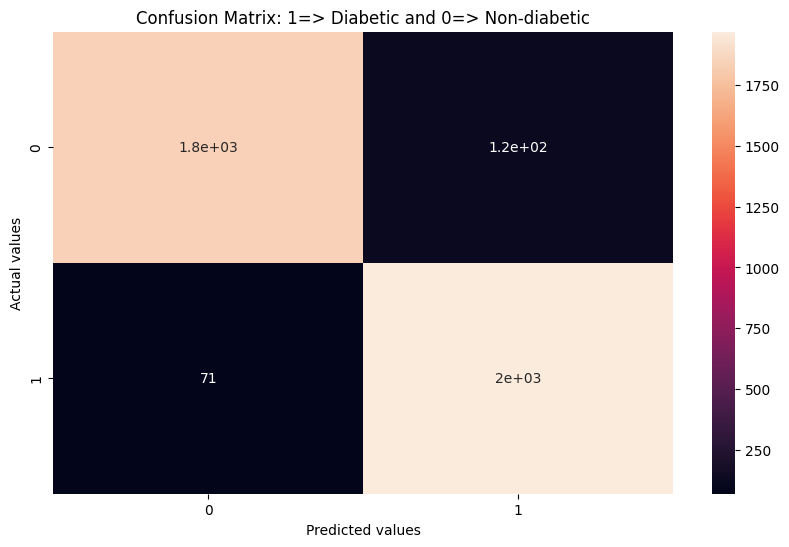

In [46]:
# Using seaborn and plt for better visualization
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(c_matrix, annot=True)
plt.title('Confusion Matrix: 1=> Diabetic and 0=> Non-diabetic')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [47]:
# Percentage of correct prediction
# => (True_Positives + True_Negatives)/(Total_Predictions)
print("Accuracy Score:",metrics.accuracy_score(test_y,y_pred))

Accuracy Score: 0.9515


In [48]:
# Correct positive predictions relative to total positive predictions
# => (True_Positives)/(True_Positives + False_Positives)
# usually the "positive" is the less common classification (dead).
print("Precision Score:",metrics.precision_score(test_y,y_pred))

Precision Score: 0.9411764705882353


In [49]:
# Correct positive predictions relative to total true positive predictions
# => (True_Positives)/(True_Positives + False_Negatives)
# usually the "positive" is the less common classification (dead).
print("Recall Score:",metrics.recall_score(test_y,y_pred))

Recall Score: 0.9651790093182933


In [50]:
print("ROC_AUC Score:",metrics.roc_auc_score(test_y,y_pred))

ROC_AUC Score: 0.951227954429672


In [51]:
test_X

Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
19134            7            170                      71                46   
4981             0            138                      58                46   
16643            5            100                      63                46   
19117            5             98                      60                12   
5306             2             78                      49                20   
...            ...            ...                     ...               ...   
17088            5            102                      85                38   
11121            9             63                      78                38   
9861             0             55                      45                26   
14548            0             67                      92                28   
8781             4            123                      60                42   

       SerumInsulin        BMI  DiabetesPedigree  Age  
19134           169  31.749403          0.157663   43  
4981            151  18.367250          0.081468   21  
16643            68  47.803673          0.550255   46  
19117            68  49.614204          0.300959   46  
5306            295  35.886250          0.677302   42  
...             ...        ...               ...  ...  
17088            55  28.998905          0.158480   25  
11121           285  30.805042          2.180054   22  
9861             32  21.795702          0.827176   39  
14548            45  20.912823          0.126779   23  
8781             87  19.282177          0.197712   21  

[4000 rows x 8 columns]

In [52]:
y_test_val = test_y.values
y_test_val = pd.Series(data=y_test_val, name='Actual Status')
y_test_val

0       1
1       0
2       1
3       1
4       1
       ..
3995    1
3996    1
3997    0
3998    0
3999    1
Name: Actual Status, Length: 4000, dtype: int32

In [53]:
y_prediction = pd.Series(y_pred,name='Predicted Status')
y_prediction

0       1
1       0
2       1
3       1
4       1
       ..
3995    1
3996    1
3997    0
3998    0
3999    1
Name: Predicted Status, Length: 4000, dtype: int32

In [54]:
test_array_df = pd.concat((test_X, y_test_val, y_prediction),axis=1)
test_array_df.head(60)

Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
19134          7.0          170.0                    71.0              46.0   
4981           0.0          138.0                    58.0              46.0   
16643          5.0          100.0                    63.0              46.0   
19117          5.0           98.0                    60.0              12.0   
5306           2.0           78.0                    49.0              20.0   
230            7.0           68.0                    73.0              55.0   
3148           1.0           93.0                    85.0              10.0   
11525          8.0          110.0                    88.0              31.0   
13672         11.0          135.0                    60.0              70.0   
1624           9.0          145.0                    47.0              53.0   
13415          7.0          174.0                    86.0              52.0   
18827          3.0          142.0                    68.0               8.0   
18550          3.0          133.0                    63.0              29.0   
5228           2.0           79.0                    62.0              28.0   
4623           4.0          113.0                   100.0              56.0   
3719           9.0          100.0                    50.0              26.0   
11640          4.0          121.0                    60.0              15.0   
2461           1.0           70.0                    62.0              15.0   
2051           2.0           77.0                    90.0              37.0   
15410          4.0          115.0                    59.0              45.0   
13290          0.0           85.0                    83.0              15.0   
6518           0.0          130.0                    48.0               8.0   
768            9.0           90.0                    52.0              11.0   
19197          2.0          174.0                    80.0              13.0   
16663          7.0           98.0                    60.0              55.0   
17114          8.0           98.0                    66.0              12.0   
4144           6.0          171.0                    51.0              22.0   
18896          3.0           54.0                    89.0              48.0   
16559          8.0           92.0                    64.0              13.0   
7025           8.0           71.0                    78.0              45.0   
12941          0.0          134.0                    65.0              11.0   
5739           5.0           44.0                    85.0              12.0   
15512          4.0          153.0                    99.0              40.0   
13294          0.0          171.0                    42.0              45.0   
3907           4.0           84.0                    62.0              39.0   
14759          0.0           93.0                    95.0               9.0   
17037          8.0          107.0                    65.0              65.0   
5948           9.0           70.0                    58.0              42.0   
18945          3.0           97.0                    57.0              15.0   
15492          4.0          176.0                    74.0              28.0   
13293          0.0          165.0                    52.0              15.0   
4872           9.0          101.0                    43.0              11.0   
11107          1.0          144.0                    64.0               8.0   
13348          1.0           95.0                    61.0              37.0   
19500          6.0          110.0                    62.0              14.0   
2976           0.0           89.0                    94.0              23.0   
51             1.0           50.0                    68.0              41.0   
16571          8.0           97.0                    80.0              38.0   
134            1.0           96.0                    47.0              35.0   
3319           0.0           78.0                    52.0

In [55]:
test_array_df.to_excel('Initial_DM_Outcome_Results.xlsx')
print("The data output has been exported successfully")

The data output has been exported successfully
